# Questão 1

Considere o problema de análise de componentes principais (PCA), isto é, determinar em  uma  distribuição  de  dados  as  componentes  que  tenham  associadas  a  elas  a  maior variância e representar as mesmas no espaço de dados formado pelos autovetores da matriz de correlação. Neste sentido considere o seguinte problema.A tabela abaixo apresenta os dados relativos a amostras de solo. Para cada amostra, tem-se as medidas das porcentagens de areia (X1), sedimentos (X2), argila (X3) e a quantidade de material  orgânico  (X4).  Da  referida  tabela  obtenha  as  estatísticas  descritivas  de  cada variável,  isto  é,    a  média,  a  mediana,  o  desvio  padrão,  os  valores  máximo  e  mínimo.Sob estas condições :

In [6]:
import pandas as pd 
import numpy as np

dataset = pd.read_csv('q1_data.csv')

dataset.head()

,x1,x2,x3,x4
0,79.9,13.9,6.2,3.3
1,78.5,16.3,7.2,2.5
2,68.9,22.6,8.5,3.6
3,62.2,20.2,17.6,2.8
4,69.2,23.7,7.1,0.9


### a) Obtenha desta tabela a matriz de correlação.

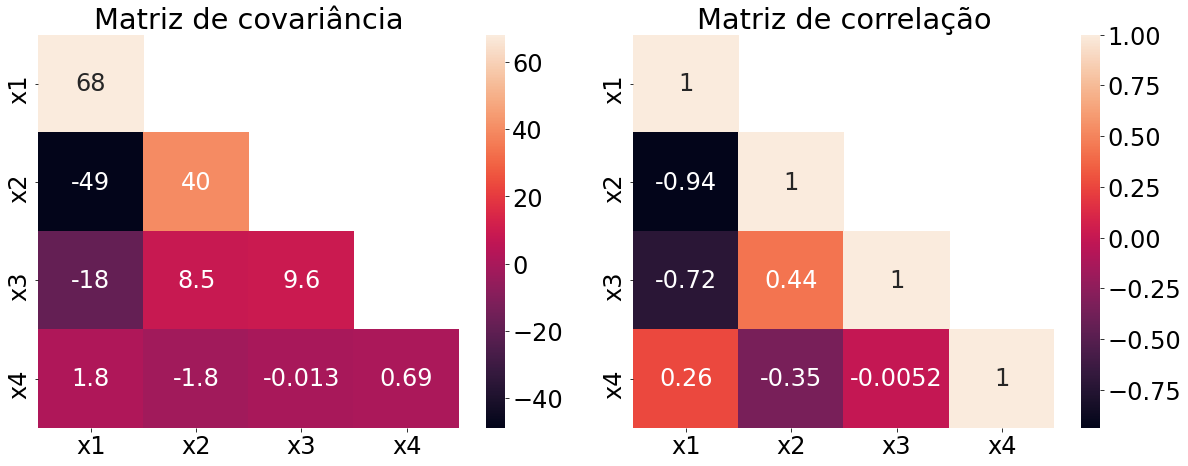

In [135]:
from matplotlib import pyplot as plt
import seaborn as sns

corr_matrix = dataset.corr()
corr_trace = np.trace(corr_matrix)

cov_matrix = dataset.cov()
cov_trace = np.trace(cov_matrix)

plt.rcParams.update({'font.size': 24})
fig, axes = plt.subplots(ncols=2, figsize=(17, 7))

mask = np.array([
    [0., 1., 1., 1.],
    [0., 0., 1., 1.],
    [0., 0., 0., 1.],
    [0., 0., 0., 0.]
])

sns.heatmap(cov_matrix, mask=mask, annot=True, ax=axes[0])
axes[0].set_title('Matriz de covariância') 

sns.heatmap(corr_matrix, mask=mask, annot=True, ax=axes[1])
axes[1].set_title('Matriz de correlação')


plt.tight_layout()
plt.show()

### b) Desta   matriz   determine   os   autovalores   ordenados   do   máximo   ao   mínimo   e   os autovetores correspondentes.

In [137]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

np.set_printoptions(precision=3)

print('\t\nPara a matrix de covariância:\n')
print('Autovalores\tAutovetores')
for e_value, e_vector in sorted(zip(eigenvalues, eigenvectors), reverse=True):
    print(f'{e_value:.3f}\t\t{e_vector}')

	
Para a matrix de covariância:

Autovalores	Autovetores
108.993		[-0.788  0.229 -0.57  -0.028]
8.766		[ 0.583  0.571 -0.578  0.029]
0.583		[-0.023 -0.076 -0.048  0.996]
0.050		[ 0.196 -0.785 -0.582 -0.083]


De modo geral, os autovetores com os autovalores mais baixos carregam o mínimo de informações sobre a distribuição dos dados, e são esses que devem ser eliminados. Nesse caso o novo espaço vetorial será composto pelos autovetores com autovalores iguais a 108.993 e 8.776

### c) Apresente as equações das componentes principais, isto é, cada componente é dada por: $ Y_i = e^t_j \cdot X_i = e_{1, i} X_1 + e_{2, i} X_2 + e_{3, i} X_3 + e_{1, 4} X_4$, i = 1, 2, 3, 4,  onde $e_{ji}$ é a componente i do autovetor j.



$ Y_1 = -0.788 \cdot X_1 + 0.229 \cdot X_2 -0.57 \cdot X_3 -0.028 \cdot X_4 $
     
$ Y_2 =  0.583 \cdot X_1 + 0.571 \cdot X_2 -0.578 \cdot X_3 + 0.029 \cdot X_4 $

$ Y_3 = -0.023 \cdot X_1 -0.076 \cdot X_2 -0.048 \cdot X_3 + 0.996 \cdot X_4 $
   
$ Y_4 = 0.196 \cdot X_1 -0.785 \cdot X_2 -0.582 \cdot X_3 -0.083 \cdot X_4 $

### d) Calcule os percentuais de variância para cada componente e ordene a classificação das variáveis segundo este critério. 

In [162]:
for idx, eigenvalue in enumerate(sorted(eigenvalues, reverse=True)):
    print(f'Y_{idx + 1} explica {(eigenvalue/cov_trace)*100:.3f}% da variância total.')



Y_1 explica 92.061% da variância total.
Y_2 explica 7.404% da variância total.
Y_3 explica 0.493% da variância total.
Y_4 explica 0.042% da variância total.
